In [39]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

patient_icd_path = "../../../PATIENT_ICD_BINARY.CSV"

In [17]:
picd = pd.read_csv(ukbpath, sep=" ")

In [10]:
picd

,SUBJECT_ID,0030,0031,0038,0039,0041,0048,0049,0051,00581,...,V8801,V8811,V8812,V8821,V9010,V902,V9039,V9081,V9089,V9103
0,109,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,112,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,113,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,114,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46515,97164,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46516,97484,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46517,97488,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46518,97492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
pdata = picd.drop("SUBJECT_ID", axis=1).T.to_numpy()
pdata

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
sorted_idx = []
last_idx = 0
seen = set([11111])

for icd_idx in tqdm(range(pdata.shape[0])):
    icd_row = pdata[icd_idx]
    has_icd = set(np.nonzero(icd_row)[0])
    has_icd -= seen
    sorted_idx += list(has_icd)
    seen.update(sorted_idx)

100%|██████████| 6984/6984 [00:11<00:00, 592.62it/s]


In [37]:
pdata = pdata.T[sorted_idx].T

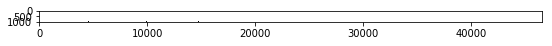

In [45]:
s = 0
n = 1000
plt.figure(figsize=(9, 90))
plt.imshow(pdata[s: s+n], cmap='Greys')
plt.savefig("{}.png".format("sorted_matrix_map"))
plt.show()